# UAS

# Pendahuluan

# Data Understanding

## Sumber Data

Dataset diambil dari link dibawah ini:

https://archive.ics.uci.edu/dataset/292/wholesale+customers

Kumpulan data mengacu pada klien distributor grosir. Ini mencakup pengeluaran tahunan dalam satuan moneter (m.u.) pada berbagai kategori produk

## Tujuan

Dataset ini digunakan untuk membantu dalam menghitung pengeluaran tahunan seorang klien distributor grosir dalam satuan moneter.

## Integrasi Data

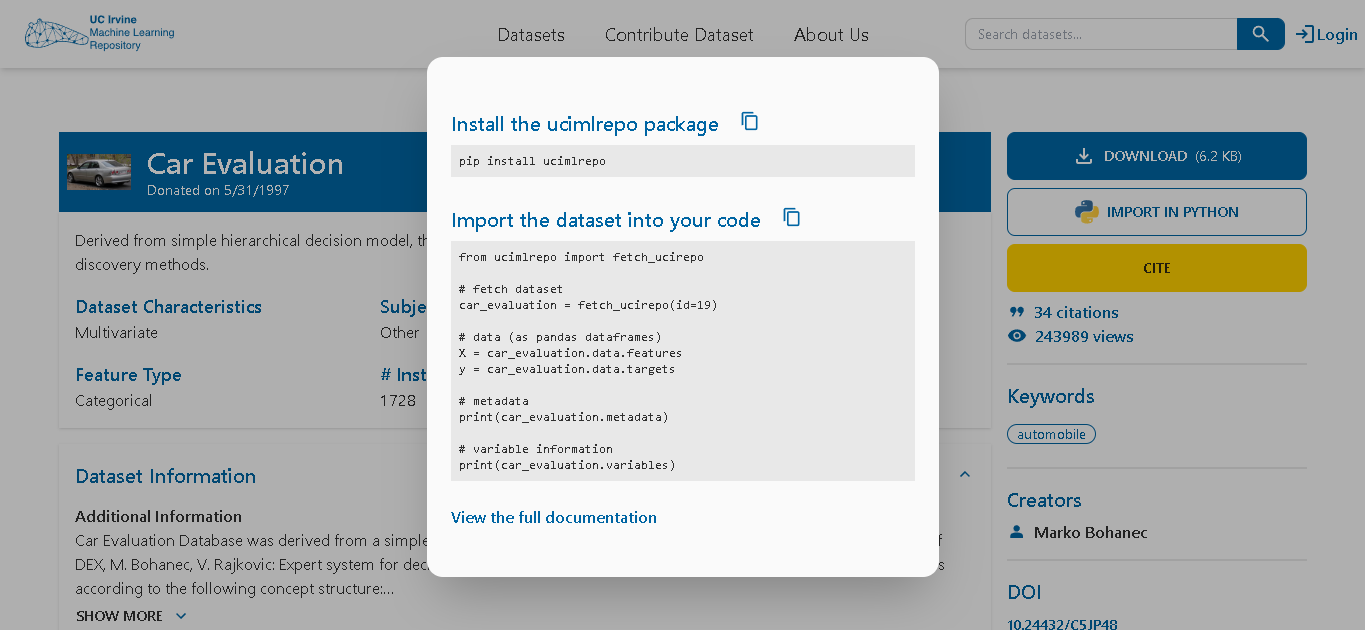

In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

data = wholesale_customers.data.original
data.to_csv("wholesale_customers.csv", index=True)

# metadata
print(wholesale_customers.metadata)

# variable information
print(wholesale_customers.variables)


{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

# Eksplorasi Data

## Data Asli

In [3]:
display(data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Data Numerik (Encode)

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Apply LabelEncoder to each column in the 'data' DataFrame
for col in data.columns:
    data[col] = le.fit_transform(data[col])

display(data)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,2,285,349,276,31,276,240
1,1,2,190,353,306,227,286,289
2,1,2,179,341,280,267,294,397
3,0,2,291,73,196,372,159,292
4,1,2,369,265,270,327,253,388
...,...,...,...,...,...,...,...,...
435,0,2,396,375,374,411,63,324
436,0,2,414,91,18,341,34,331
437,1,2,302,392,418,67,404,300
438,0,2,246,130,112,154,56,315


## Visualisasi Data

/tmp/ipykernel_3182/4262954352.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=data, palette='viridis')


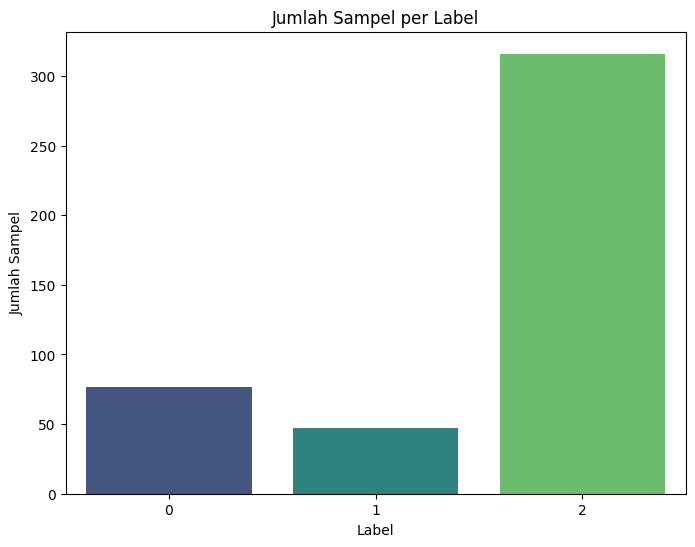

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(x='Region', data=data, palette='viridis')
plt.title('Jumlah Sampel per Label')
plt.xlabel('Label')
plt.ylabel('Jumlah Sampel')
plt.show()

<Figure size 1200x1000 with 0 Axes>

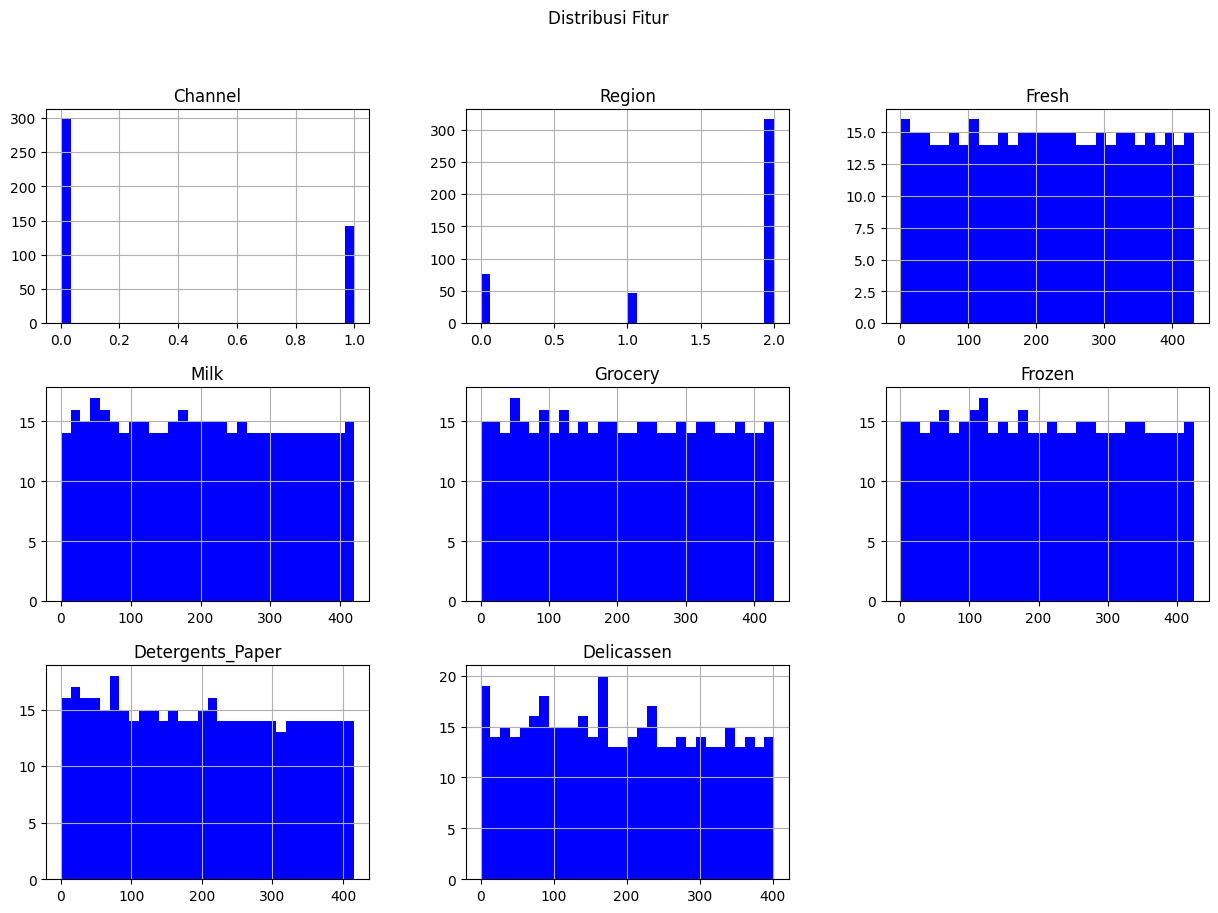

In [6]:
# Visualisasi distribusi fitur dengan histogram
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

# Struktur Dataset

## Fitur dan Label

In [7]:
data.shape #untuk mengetahui bentuk dataset(baris & kolom)

(440, 8)

Terdapat 1728 baris dan 7 kolom

In [8]:
data.columns #untuk mengetahui kolom-kolom yang ada pada dataset

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

Fitur adalah atribut atau variabel independen dalam dataset yang digunakan untuk membuat prediksi.

Terdapat 7 fitur pada dataset ini:


* Channel: Berisi informasi Saluran Pelanggan - Horeca (Hotel/Restoran/Kafe) atau Saluran Ritel pada dataset
* Fresh: Berisi informasi pengeluaran tahunan (m.u.) untuk produk segar pada dataset
* Milk: Berisi informasi pengeluaran tahunan (m.u.) untuk produk susu pada dataset
* Grocery: Berisi informasi pengeluaran tahunan (m.u.) untuk produk grosir dari dataset
* Frozen: Berisi informasi pengeluaran tahunan (m.u.) untuk produk beku pada dataset
* Detergents_Paper: Berisi informasi pengeluaran tahunan (m.u.) untuk deterjen dan produk kertas pada dataset
* Delicassen: Berisi informasi Berisi informasi pengeluaran tahunan (m.u.) dan produk makanan lezat pada dataset

Label adalah variabel dependen atau target yang ingin diprediksi oleh model machine learning. Label merupakan output yang dipelajari oleh model dari data.

Terdapat 1 field label dengan 3 tipe pada dataset ini:

Region 1 dilambangkan dengan angka 0.

Region 2 dilambangkan dengan angka 1.

Region 3 dilambangkan dengan angka 2.


In [9]:
data.dtypes #untuk mengetahui tipe data dari masing-masing kolom

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Lebih Jelas:

**Channel**

Berisi informasi Saluran Pelanggan - Horeca (Hotel/Restoran/Kafe) atau Saluran Ritel pada dataset

**Fresh**

Berisi informasi pengeluaran tahunan (m.u.) untuk produk segar pada dataset

**Milk**

Berisi informasi pengeluaran tahunan (m.u.) untuk produk susu pada dataset

**Grocery**

Berisi informasi pengeluaran tahunan (m.u.) untuk produk grosir dari dataset

**Frozen**

Berisi informasi pengeluaran tahunan (m.u.) untuk produk beku pada dataset

**Detergents_Paper**

Berisi informasi pengeluaran tahunan (m.u.) untuk deterjen dan produk kertas pada dataset

**Delicassen**

Berisi informasi Berisi informasi pengeluaran tahunan (m.u.) dan produk makanan lezat pada dataset

In [10]:
data.groupby('Region').size() #untuk mengetahui jumlah masing-masing class

Region
0     77
1     47
2    316
dtype: int64

# **Identifikasi Kualitas Dataset**

## Deteksi Missing Value

Missing value merupakan data yang hilang pada suatu dataset. Hal ini bisa terjadi oleh beberapa faktor, diantaranya adalah :

* Interviewer recording error terjadi akibat kelalaian petugas pengumpul data (pewawancara), misalnya ada sejumlah pertanyaan yang terlewatkan.

* Respondent inability error terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat, misalnya karena tidak memahami pertanyaan, bosan atau kelelahan (respondent fatigue) akhirnya responden mengosongkan sejumlah pertanyaan atau berhenti mengisi kuesioner di tengah jalan.

* Unwillingness respondent error terjadi karena responden tidak berkenan memberikan jawaban yang akurat, misalnya pertanyaan soal penghasilan, usia, berat badan, pengalaman melakukan pelanggaran hukum, dll.

Cara penanganan Missing Values :

* Mengabaikan dan membuang missing data.

* Estimasi parameter.

* Imputasi.

Dalam modul kali ini saya akan menangani missing values menggunakan metode imputasi, yang ada 2 metode yaitu menggunakan metode Mean dan menggunakan metode KNN.

pada kolom di bawah ini akan dilakukan pendeteksian missing values terlebih dahulu pada masing-masing kolom.

In [11]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = data.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []
Missing Value Counts:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


Berdasarkan proses pengecekan missing value di atas, didapatkan hasil seperti berikut:

* Fitur Channel memiliki 0 missing value.

* Fitur Fresh memiliki 0 missing value.

* Fitur Milk memiliki 0 missing value.

* Fitur Grocery memiliki 0 missing value.

* Fitur Frozen memiliki 0 missing value.

* Fitur Detergens_Paper memiliki 0 missing value.

* Fitur Delicatassen memiliki 0 missing value.

# **Preprocessing Data**

## Imputasi Missing Value

### Mean

setelah missing value terdeteksi, kita perlu untuk mengisi data yang kosong dengan data yang pas agar data dapat digunakan, ada banyak cara untuk mengisi missing value antara lain yaitu dengan menggunkan metode mean,pada tahap ini kita akan melakukan imputasi dengan metode mean.

Untuk langkah-langkah nya sebagai berikut:

* hitung rata rata setiap kolom pada ‘data’ lalu simpan hasilnya di suatu variable disini saya mendefinisikan ‘mean_values’

* gunakan metode dari pandas untuk mengisikan/mengantikan value yang kosong/hilang pada dataFrame. saya disini untuk mengisi value yang kosong dengan menjumlahkan rata-rata dari setiap kolom.

In [12]:
mean_values = data.mean()
data_filled = data.fillna(mean_values)

print("ini hasil perhitungan mean menggunakan (fillna)")
print(mean_values)
print("")

print("input tiap kolom missing dengan mean")
print("jika output false berarti sudah tidak ada missing value")
print(data_filled.isnull())
print("")
print("")

print("melihat secara tiap karakter")
print(data_filled.isnull().any())
print("")
print("")

missing_values = data_filled.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("Jumlah Missing Value:")
print(missing_counts) #melihat missing value (jika ada) pada semua fitur

ini hasil perhitungan mean menggunakan (fillna)
Channel               0.322727
Region                1.543182
Fresh               215.097727
Milk                206.013636
Grocery             212.518182
Frozen              210.084091
Detergents_Paper    201.729545
Delicassen          193.975000
dtype: float64

input tiap kolom missing dengan mean
jika output false berarti sudah tidak ada missing value
     Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0      False   False  False  False    False   False             False   
1      False   False  False  False    False   False             False   
2      False   False  False  False    False   False             False   
3      False   False  False  False    False   False             False   
4      False   False  False  False    False   False             False   
..       ...     ...    ...    ...      ...     ...               ...   
435    False   False  False  False    False   False             False   
436    Fals

**KNN**
Pada tahapan ini kami akan melakukan imputasi missing value dengan metode KNN dengan perhitungan jarak menggunakan rumus euclidien distance.

Langkah-langkah KNN :

* Tentukan jumlah tetangga (K) yang akan digunakan untuk pertimbangan penentuan kelas (metode cross validation)

* Hitung jarak dari data baru ke masing-masing data point di dataset (eulidien distance).

* Ambil tetangga terdekat menurut K, kemudian hitung rata-ratanya.

Sedangkan untuk mencari nilai K terbaik kami menggunakan Cross validation.

K-Fold Cross Validation atau lebih sering disebut cross validation adalah salah satu teknik yang populer dipakai dalam evaluasi model ML. Pada cross validation dataset dibagi sebanyak K lipatan. Pada setiap iterasi setiap lipatan akan dipakai satu kali sebagai data uji dan lipatan sisanya dipakai sebagai data latih. Dengan menggunakan cross validation kita akan memperoleh hasil evaluasi yang lebih akurat karena model dievaluasi dengan seluruh data.

Nilai K yang akan diuji = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


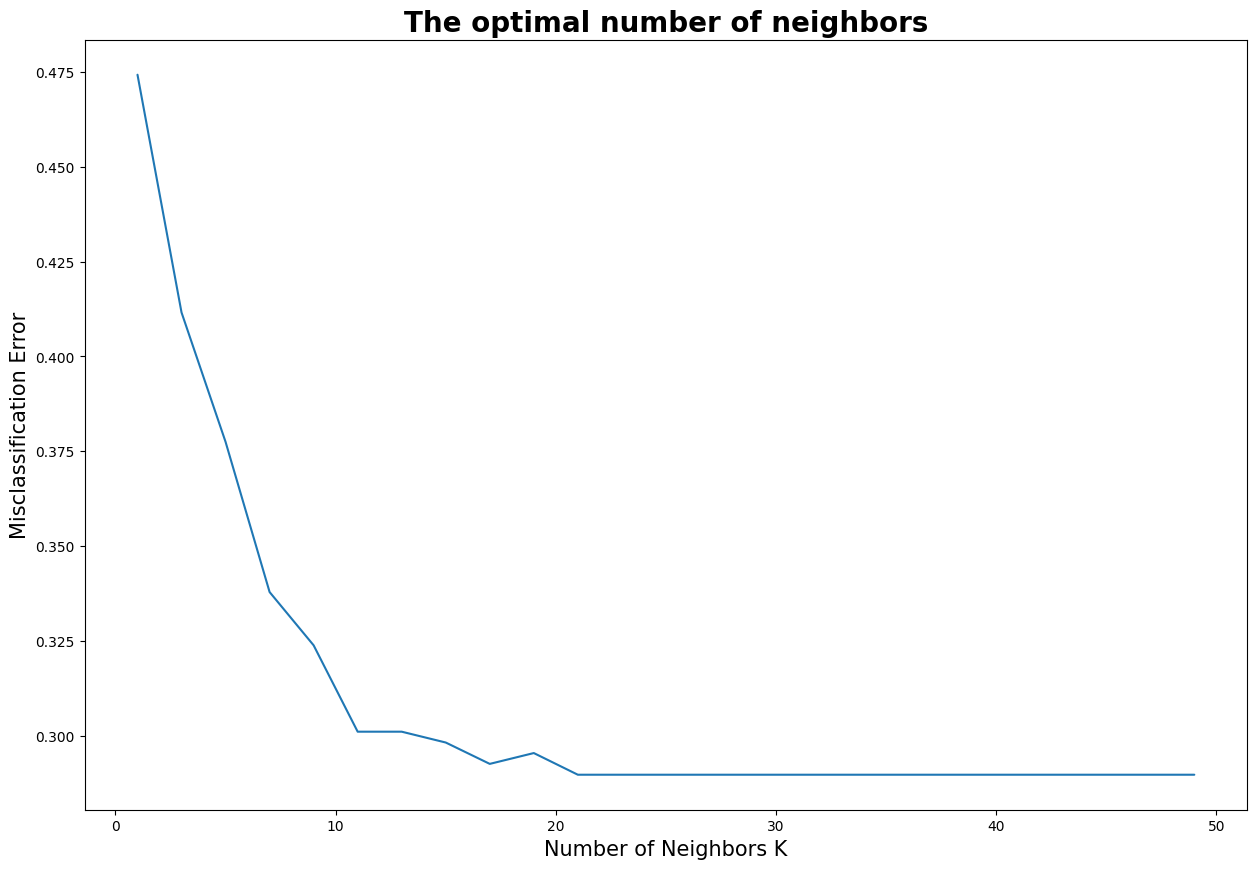

The optimal number of neighbors is 21.


In [13]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Memisahkan fitur dan label
feature_columns = ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[feature_columns].values # Use the label-encoded 'data' DataFrame
y = data['Region'].values # Use the label-encoded 'data' DataFrame

# Mengubah label menjadi numerik
le = LabelEncoder()
y = le.fit_transform(y)


# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat list k untuk KNN
k_list = list(range(1, 50, 2))
print(f"Nilai K yang akan diuji = {k_list}")
cv_scores = []

# Melakukan 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Menghitung MSE
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15, 10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

# Menemukan nilai k terbaik
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

Setelah didapati jumlah K terbaik, maka kita coba cek akurasinya.

In [14]:
classifier = KNeighborsClassifier(n_neighbors=5)

# Melatih model
classifier.fit(X_train, y_train)

# Memprediksi data uji
y_pred = classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 68.18 %.


setelah didapati akurasi model apabila K berjumlah 5 mendapat hasil 68,18%. maka model tersebut dikatakan kurang baik karena berada di bawah 85%. langkah selanjutnya adalah melakukan imputasi dengan KNN.

In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# Inisialisasi KNNImputer
imputer = KNNImputer(n_neighbors=9, metric='nan_euclidean')

# Lakukan imputasi pada data yang memiliki nilai yang hilang
data_imputed = imputer.fit_transform(data)

# Konversi hasil imputasi menjadi DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=data.columns)

# Detect missing values
missing_values = data_imputed_df.isnull()

# Count missing values in each column
missing_counts = missing_values.sum()

# Display missing value counts
print("---------------------------Missing Value Counts---------------------------".center(100))
print(missing_counts)


             ---------------------------Missing Value Counts---------------------------             
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


# Pendeteksian Outlier

Outlier/pencilan merupakan data pada dataset yang menyimpang dari data lainnya,mendeteksi outlier perlu agar data yang diolah memberikan hasil yang baik pada model yang akan dibuat nantinya. Outlier dapat diidentifikasi dan ditangani dengan beberapa cara antara lain yang akan kami gunakan yaitu LOF(Local Outlier Factor).

## Konsep Local Outlier Factor

Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier yang ada dalam kumpulan data. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan lokalnya, maka titik tersebut disebut local outlier. LOF akan mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data.

Untuk memahami LOF, ada beberapa konsep yang harus dipelajari secara berurutan:

* K-distance dan K-neighbors

* Reachability Distance (RD)

* Local Reachability Density (LRD)

* Local Outlier Factor (LOF)

**K-distance** adalah jarak antara suatu titik, dan merupakan tetangga terdekat Kᵗʰ. Tetangga K yang dilambangkan dengan Nₖ(A) mencakup himpunan titik yang terletak di dalam atau pada lingkaran berjari-jari jarak K. K-tetangga bisa lebih dari atau sama dengan nilai K. Kita akan melihat contohnya. Katakanlah kita mempunyai empat titik A, B, C, dan D. Jika K=2, K-tetangga A adalah C, B, dan D. Di sini, nilai K=2 tetapi ||N₂(A)|| = 3. Oleh karena itu, ||Nₖ(titik)|| akan selalu lebih besar atau sama dengan K.

**Reachability Distance (RD)** Ini didefinisikan sebagai jarak K maksimum Xj dan jarak antara Xi dan Xj. Ukuran jarak bersifat khusus untuk masalah (Euclidean, Manhattan, dll.) Dalam istilah awam, jika titik Xi terletak di dalam K-tetangga Xj, maka jarak jangkauannya adalah K-jarak Xj (garis biru), jika tidak, jarak jangkauannya adalah jarak antara Xi dan Xj (garis oranye).

**Local reachability density (LRD)** merupakan kebalikan dari rata-rata jarak jangkauan A dari tetangganya. Semakin besar jarak jangkauan rata-rata (yaitu, tetangga jauh dari titik tersebut), semakin sedikit kepadatan titik yang ada di sekitar titik tertentu. Ini menunjukkan seberapa jauh suatu titik dari kelompok titik terdekat. Nilai LRD yang rendah menunjukkan bahwa cluster terdekat berada jauh dari titik.

**Local Outlier Factor (LOF)** LRD tiap titik digunakan untuk membandingkan dengan rata-rata LRD K tetangganya. LOF adalah perbandingan rata-rata LRD K tetangga A terhadap LRD A. Jika suatu titik bukan merupakan pencilan (inlier), rasio rata-rata LRD tetangganya kira-kira sama dengan LRD suatu titik (karena kepadatan suatu titik dan tetangganya kira-kira sama). Dalam hal ini, LOF hampir sama dengan 1. Sebaliknya, jika suatu titik merupakan outlier, LRD suatu titik lebih kecil dari rata-rata LRD tetangganya. Maka nilai LOF akan tinggi. Umumnya jika LOF > 1 maka dianggap outlier, namun hal tersebut tidak selalu benar. Katakanlah kita mengetahui bahwa kita hanya memiliki satu outlier dalam data, lalu kita ambil nilai LOF maksimum di antara semua nilai LOF, dan titik yang sesuai dengan nilai LOF maksimum akan dianggap sebagai outlier.

Untuk langkah-langkah perhitungan manual Local Outlier Factor (LOF) yaitu :

* Menghitung jarak dan menentukan tetangga

* Menghitung Reachability Distance (RD)

* Menghitung Local Reachability Distance (LRD)

* Menghitung Local Outlier Factor (LOF)

## Implementasi Local Outlier Factor dengan Scikit Learn

Sedangkan untuk perhitungan melalui code sebagai berikut:

In [16]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=9, contamination=0.03)

data1 = data_imputed_df
data1 = data1.drop(columns=data1.columns[-1])

# Melakukan prediksi outlier untuk setiap fitur
outlier_indices = []
for column in data1.columns:
    # Mengambil nilai fitur
    feature_values = data1[column].values.reshape(-1, 1)
    # Melakukan prediksi outlier
    y_pred = lof.fit_predict(feature_values)
    # Menambahkan indeks outlier ke dalam daftar outlier_indices
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Menghilangkan indeks outlier yang duplikat
outlier_indices = list(set(outlier_indices))

# Menampilkan indeks outlier yang ditemukan
print("===================================== OUTLIER =====================================")
for i in outlier_indices:
    print(f"outlier ditemukan pada baris => {i[0]}, kolom => {i[1]}")

# Mengumpulkan indeks baris yang mengandung outlier
outlier_row_indices = [index[0] for index in outlier_indices]

# Menampilkan data pada baris yang mengandung outlier
outlier_data = data_imputed_df.iloc[outlier_row_indices]
print("===================================== DATA =====================================")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)


# Mengasumsikan Anda memiliki labels outlier yang sesuai dengan indeks outlier yang Anda temukan
# Misalnya, dalam list ini, nilai 1 menunjukkan outlier, dan 0 menunjukkan bukan outlier
ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_imputed_df))]

# Menghasilkan prediksi outlier berdasarkan outlier_row_indices
predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(data_imputed_df))]

# Menghitung akurasi
precision = precision_score(ground_truth_labels, predicted_labels)

print("==================================== AKURASI ====================================")
print(f"akurasi: {precision}")

===================================== OUTLIER =====================================
outlier ditemukan pada baris => 86, kolom => Milk
outlier ditemukan pada baris => 97, kolom => Milk
outlier ditemukan pada baris => 103, kolom => Fresh
outlier ditemukan pada baris => 39, kolom => Fresh
outlier ditemukan pada baris => 47, kolom => Detergents_Paper
outlier ditemukan pada baris => 85, kolom => Grocery
outlier ditemukan pada baris => 61, kolom => Grocery
outlier ditemukan pada baris => 38, kolom => Frozen
outlier ditemukan pada baris => 183, kolom => Frozen
outlier ditemukan pada baris => 65, kolom => Grocery
outlier ditemukan pada baris => 125, kolom => Fresh
outlier ditemukan pada baris => 154, kolom => Milk
outlier ditemukan pada baris => 122, kolom => Grocery
outlier ditemukan pada baris => 96, kolom => Fresh
outlier ditemukan pada baris => 333, kolom => Detergents_Paper
outlier ditemukan pada baris => 356, kolom => Milk
outlier ditemukan pada baris => 161, kolom => Detergents_Paper
ou

untuk penanganan outlier tidak kita lakukan dikarenakan data yang terindikasi outlier masih berada di rentang yang normal(tidak melebihi interval).

Lalu untuk akurasi pendeteksian outlier memiliki akurasi nilai 1 atau 100% yang bisa dikatakan sempurna.

# Modelling Klasifikasi Gaussian Naive Bayes

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.Untuk modelling kali ini bertujuan untuk menentukan class pada suatu data inputan .Data akan dibagi menjadi 2 tipe yaitu data test dan data train dan pemodelan kali ini menggunakan metode Gaussian Naive Bayes.

Pada bagian ini akan ditentukan severity dari data yang akan saya inputan apakah termasuk jinak atau ganas.

cara kalkulasi GNB dapat melalui tahap berikut:

1. Bagi Dataset menjadi data test dan data train

ada dua jenis pembagian rasio dataset yang sering digunakan yaitu:

* 80% data train dan 20% data test.
* 70% data train dan 30% data test.

Untuk kali ini kita akan menggunkan raiso 80% data train dan 20% data test,namun kalian bisa mengubahnya tergantung situasi dan kondisi dilapangan nantinya.

2. Menghitung Probabilitas pada data train setiap sheet

lakukan perhitungan probabilitas dari masing-masing kelas sesuai dengan jumlah data train pada kelas tersebut kemudian dibagi dengan banyaknya total data train.

3. Menghitung Mean dan Standart dev

hitung mean dan standart deviasi setiap fitur pada setiap kelas di data train kita

4. menghitung Distribusi gaussian

lakukan perhitungan dengan rumus distribusi gaussian dengan rumus sebagai berikut:


5. hitung posterior

Setelah didapat semua hasil dari distribusi gaussian, langkah selanjutnya adalah menentukan posteriori-nya. Berikut ini untuk rumusnya:

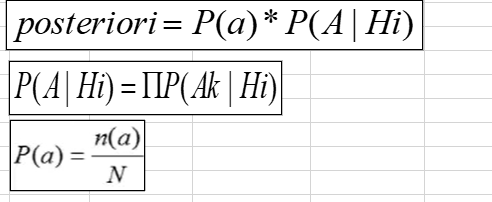

P(A|Hi) : hasil perkalian setiap fitur pada setiap kelas

P(a) : probabilitas setiap kelas

posteriori = P(A|Hi) * P(a)

6. tentukan maximum posterior

setelah kita menghitung semua posterior maka dapat kita cari mana yang terbesar

data posterior paling besar tersebut yang merupakan akan menjadi class dari data yang kita inputkan

MODEL

berikut model yang telah kita buat untuk mendeteksi kanker payudara

In [17]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ucimlrepo import fetch_ucirepo

# memisahkan atribut dan label
X = data[['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
y = data['Region']

# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# membuat model Gaussian naive bayes
gnb_model = GaussianNB()

# Melatih model dengan menggunakan data latih
gnb_model = gnb_model.fit(X_train, y_train)

In [18]:
y_pred = gnb_model.predict(X_test)

print("=========================== X TRAINING =================================")
print(X_train)
print("=========================== X TESTING =================================")
print(X_test)
print("=========================== Y TESTING =================================")
print(y_test)

=========================== X TRAINING =================================
     Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
45         1    149   406      398     223               371         383
264        1     46   350      370       7               348         233
4          1    369   265      270     327               253         388
236        0    219    34      159     260               144          48
432        0    360    68      211      41               234          88
..       ...    ...   ...      ...     ...               ...         ...
323        0    292    50      335     138               248         127
192        0    157    95      113      82                66          93
117        0    187   220      236     215               114         226
47         1    422   419      426     383               412         395
172        0     43   266      253      50               279         148

[352 rows x 7 columns]
===========================

berikut cara menjadikan data train kita ke dalam bentuk csv.

In [19]:
import pandas as pd

# Concatenate X_train and y_train as new column
train_data = pd.concat([X_train, pd.Series(y_train, name='Region')], axis=1)

# Save training data to CSV with tab-separated values
train_data.to_csv('wholesale_customers.csv', sep="\t", index=False)

uji coba inputan dengan data test menggunakan model yang kita buat.

In [20]:
print("Data yang akan digunakan adalah")
print(data.iloc[231])
print("data yang diinputkan merupakan class=",gnb_model.predict([[3, 2, 0, 1, 0, 1, 2]]))

Data yang akan digunakan adalah
Channel               0
Region                0
Fresh                78
Milk                359
Grocery             187
Frozen              200
Detergents_Paper    245
Delicassen          107
Name: 231, dtype: int64
data yang diinputkan merupakan class= [1]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


dari hasil prediksi data tersebut termasuk ke dalam class (1). Jawabannya benar karena data yang diambil merupakan bagian dari data test yang telah dibagi pada model dan termasuk kedalam class (1).

In [21]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
fscore = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

Akurasi: 0.75
Presisi: 0.56
Recall: 0.75
F-Score: 0.64


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dari evaluasi di atas gaussian naive bayes mendapatkan akurasi sebesar 0.62 atau 62%.

# Modeling dengan Support Vector Machine(SVM)

Support Vector Machine (SVM) adalah metode dalam machine learning yang digunakan untuk pemodelan prediktif dan klasifikasi data. Berikut adalah penjelasan singkat tentang SVM. SVM digunakan untuk memisahkan dua kelas data dengan mencari hyperplane (bidang dalam ruang n-dimensi) yang memiliki margin maksimum antara dua kelas tersebut. SVM mencari hyperplane yang memaksimalkan margin, yaitu jarak terdekat antara data paling dekat dari kedua kelas (support vectors) ke hyperplane tersebut. SVM efektif untuk data dengan jumlah fitur besar, cocok untuk data terstruktur, dan mampu menangani data yang tidak seimbang. SVM melakukan optimisasi untuk menemukan hyperplane yang optimal dengan meminimalkan fungsi kerugian dan mengatur parameter seperti C (cost) untuk menyesuaikan trade-off antara margin dan kesalahan klasifikasi.

Untuk memisahkan data training dan data testing menggunakan K-fold crossvalidation. K-fold cross-validation digunakan untuk mengukur seberapa baik model machine learning dapat menggeneralisasi dari data pelatihan ke data yang tidak terlihat (data uji).

Langkah-langkahnya :

* Data dibagi menjadi k subset atau fold yang sama ukurannya.

* Sebagai contoh, jika k = 5, maka data dibagi menjadi 5 bagian dengan ukuran yang sama.

* Proses evaluasi dilakukan secara iteratif sebanyak k kali.

* Pada setiap iterasi, salah satu fold digunakan sebagai data uji, sementara k-1 fold lainnya digunakan sebagai data pelatihan. Setiap iterasi menghasilkan satu nilai metrik evaluasi (misalnya akurasi, presisi, recall, atau F1-score) berdasarkan prediksi pada data uji.

* Akhirnya, nilai metrik evaluasi dari k iterasi ini diambil rata-ratanya untuk memberikan estimasi yang lebih baik tentang kinerja model.

Implementasi dalam code:

In [22]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Memisahkan atribut dan label
X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
y = data.iloc[:, -1]   # Kolom terakhir sebagai label

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=0)

# Menggunakan StratifiedKFold untuk mempertahankan distribusi kelas yang sama pada setiap fold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# List untuk menyimpan akurasi dan indeks fold
accuracy_list = []
fold_idx = 0

# Loop untuk cross-validation dan mencari fold dengan akurasi tertinggi
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Melatih model SVM
    svm_model.fit(X_train, y_train)

    # Evaluasi model
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    # Tampilkan akurasi untuk setiap fold
    print(f"Akurasi Fold-{fold_idx + 1}: {accuracy:.4f}")

    # Jika akurasi tertinggi pada fold ini, simpan data training dan testingnya
    if accuracy == max(accuracy_list):
        best_fold_train_data = pd.concat([X_train, y_train], axis=1)
        best_fold_test_data = pd.concat([X_test, y_test], axis=1)

    fold_idx += 1

# Simpan data training dari fold dengan akurasi tertinggi ke dalam file CSV
best_fold_train_data.to_csv('best_fold_training_data.csv', index=False)

# Simpan data testing dari fold dengan akurasi tertinggi ke dalam file CSV
best_fold_test_data.to_csv('best_fold_testing_data.csv', index=False)

Akurasi Fold-1: 0.0000


/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Akurasi Fold-2: 0.0068
Akurasi Fold-3: 0.0000


In [23]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Memuat kembali data training dan testing
train_data = pd.read_csv('best_fold_training_data.csv')
test_data = pd.read_csv('best_fold_testing_data.csv')

# Memisahkan atribut dan label untuk data training
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# Memisahkan atribut dan label untuk data testing
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=0)

# Melatih model SVM menggunakan data training
svm_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data testing
y_pred = svm_model.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model : {accuracy:.4f}")

Akurasi model : 0.0068


In [24]:
print("=========================== X TRAINING =================================")
print(X_train)
print("=========================== X TESTING =================================")
print(X_test)
print("=========================== Y TESTING =================================")
print(y_test)

=========================== X TRAINING =================================
     Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper
0          1       2    285   349      276      31               276
1          1       2    179   341      280     267               294
2          0       2    291    73      196     372               159
3          1       2    233   332      224     100               254
4          1       2    277   182      262      72               283
..       ...     ...    ...   ...      ...     ...               ...
288        0       2    360    68      211      41               234
289        0       2    321   222      282     103               266
290        0       2    396   375      374     411                63
291        1       2    302   392      418      67               404
292        0       2    246   130      112     154                56

[293 rows x 7 columns]
=========================== X TESTING =================================
   

In [25]:
print("Data yang akan digunakan adalah")
print(data.iloc[2])
print("data yang diinputkan merupakan class=",gnb_model.predict([[4.0, 3.5 , 3.0,  4.0 , 2.9, 4.0, 3.8]]))


Data yang akan digunakan adalah
Channel               1
Region                2
Fresh               179
Milk                341
Grocery             280
Frozen              267
Detergents_Paper    294
Delicassen          397
Name: 2, dtype: int64
data yang diinputkan merupakan class= [1]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Peningkatan Model

Metode ensemble merupakan penggabungan beberapa individual classifier untuk membentuk classifier baru sehingga didapatkan hasil yang lebih akurat. Metode ensemble telah banyak digunakan dalam beberapa penelitian karena terbukti memberikan hasil akurasi yang lebih baik. Dalam metode ensemble, beberapa individual classifier digabungkan dengan tujuan untuk menggabungkan kelebihan dari masing-masing classifier sedemikian rupa sehingga kinerja yang dicapai dalam menyelesaikan tugas menjadi lebih baik. Contoh metode klasifikasi yang umum adalah: bagging, boosting dan stacking. Namun pada kesempatan ini saya hanya menggunakan stacking dan bagging saja untuk peningkatan model.

## Stacking Classifier(Meta Classifier)

Stacking melibatkan penggabungan beberapa model berbeda dan menggunakan model yang lebih tinggi (meta-model) untuk menggabungkan hasil prediksi dari model-model tersebut. Stacking memungkinkan untuk memanfaatkan kekuatan berbagai jenis model.

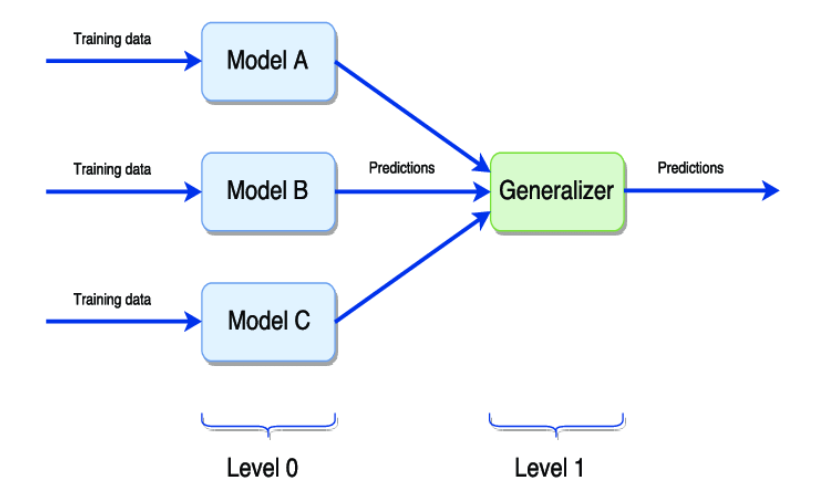

pada stacking saya akan menggunakan model KNN dengan nilai tetangga berbeda-beda sebagai base model kemudian hasil prediksi akan dimasukan ke dalam model GNB sebagai meta model (generalizer) untuk prediksi.

Cara kerja stacking
1. Base Models (Model Dasar):

  * Model-model dasar (base models) pertama-tama dilatih menggunakan data pelatihan.

  * Setelah dilatih, masing-masing model dasar menghasilkan prediksi.

  * Setelah itu gabungkan hasil prediksi sehingga menjadi data baru dan data tersebut akan menjadi data latih dan uji pada meta model

Model A

kami melatih model KNN dengan nilai K=9

In [26]:
# KNN 1
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Memisahkan fitur dan label
feature_columns = ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[feature_columns].values
y = data['Region'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=9)

# TRAIN
classifier.fit(X_train, y_train)

# Memprediksi data uji
xtr1 = classifier.predict(X_train)

# TEST
classifier = KNeighborsClassifier(n_neighbors=3)

# Melatih model
classifier.fit(X_test, y_test)

x_baru=[[5, 8, 4, 3, 3, 5, 7]]

# Memprediksi data uji
xts1 = classifier.predict(X_test)
xtst_baru=classifier.predict(x_baru)
print ("prediksi untuk data baru: ", xtst_baru)

prediksi untuk data baru:  [2]


Model B

kami melatih model KNN dengan nilai K=5

In [27]:
# KNN 2
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Memisahkan fitur dan label
feature_columns = ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[feature_columns].values
y = data['Region'].values

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier2 = KNeighborsClassifier(n_neighbors=5)

# TRAIN
classifier2.fit(X_train, y_train)

# Memprediksi data uji
xtr2 = classifier2.predict(X_train)

# TEST
classifier2 = KNeighborsClassifier(n_neighbors=5)

# Melatih model
classifier2.fit(X_test, y_test)
x_baru=[[5, 8, 4, 3, 3, 5, 7]]

# Memprediksi data uji
xts2 = classifier2.predict(X_test)
xtst2_baru=classifier2.predict(x_baru)
print(xtst2_baru)

[2]


Setelah itu, gabungkan hasil prediksi dari kedua model menjadi sebuah dataset baru

In [28]:
# MODEL A
combined_df = pd.DataFrame({
    'X1': xtr1,
    'X2': xtr2,
    'Y': y_train
})

# Save the DataFrame to a CSV file
combined_df.to_csv('combine_train.csv', index=False)

In [29]:
# MODEL B
combined_df = pd.DataFrame({
    'X1': xts1,
    'X2': xts2,
    'Y': y_test
})

# Save the DataFrame to a CSV file
combined_df.to_csv('combine_test.csv', index=False)

In [30]:
df = pd.read_csv('combine_train.csv')
df.head()

,X1,X2,Y
0,2,2,2
1,2,2,0
2,2,2,2
3,2,2,0
4,2,2,2


In [31]:
df2 = pd.read_csv('combine_test.csv')
df2.head()

,X1,X2,Y
0,0,0,0
1,2,2,2
2,0,0,0
3,2,2,1
4,2,2,2


2. Generalizer (Meta-Model):

  * Prediksi dari model-model dasar ini kemudian digunakan sebagai fitur (input) untuk melatih model baru yang disebut generalizer atau meta-model.

  * Generalizer ini akan belajar dari kombinasi prediksi-prediksi model dasar untuk membuat keputusan akhir yang lebih baik.

In [32]:
# GNB
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Menggabungkan prediksi dari kedua model KNN sebagai fitur baru
f_meta = np.column_stack((xtr1, xtr2))
X_test = np.column_stack((xts1, xts2))

# Inisialisasi dan pelatihan meta-classifier Naive Bayes
meta_classifier = GaussianNB()
meta_classifier.fit(f_meta, y_train)
predict = meta_classifier.predict(X_test)

print(classification_report(predict, y_test))
print(meta_classifier.predict([[1, 1]]))

              precision    recall  f1-score   support

           0       0.38      0.71      0.50         7
           1       0.00      0.00      0.00         1
           2       0.97      0.80      0.88        80

    accuracy                           0.78        88
   macro avg       0.45      0.50      0.46        88
weighted avg       0.91      0.78      0.84        88

[0]


## Implementasi stacking dengan scikit-learn


setelah kita mengetahui proses dari stacking classifier untuk meningkatkan model secara manual, berikutnya kami akan menggunakan bantuan library untuk membantu melatih model dasar, karena kami tidak mungkin melatih model dasar satu persatu, karena kami akan menggunakan 20 model knn sebagai model dasar dengan pembeda adalah nilai K. Dan nantinya prediksi 20 model tersebut akan dimasukkan ke dalam model gaussian naive bayes.

Accuracy of knn1: 0.6477
Accuracy of knn2: 0.7159
Accuracy of knn3: 0.7045
Accuracy of knn4: 0.7386
Accuracy of knn5: 0.7500
Accuracy of knn6: 0.7500
Accuracy of knn7: 0.7500
Accuracy of knn8: 0.7500
Accuracy of knn9: 0.7500
Accuracy of knn10: 0.7500
Accuracy of knn11: 0.7500
Accuracy of knn12: 0.7500
Accuracy of knn13: 0.7500
Accuracy of knn14: 0.7500
Accuracy of knn15: 0.7500
Accuracy of knn16: 0.7500
Accuracy of knn17: 0.7500
Accuracy of knn18: 0.7500
Accuracy of knn19: 0.7500
Accuracy of knn20: 0.7500


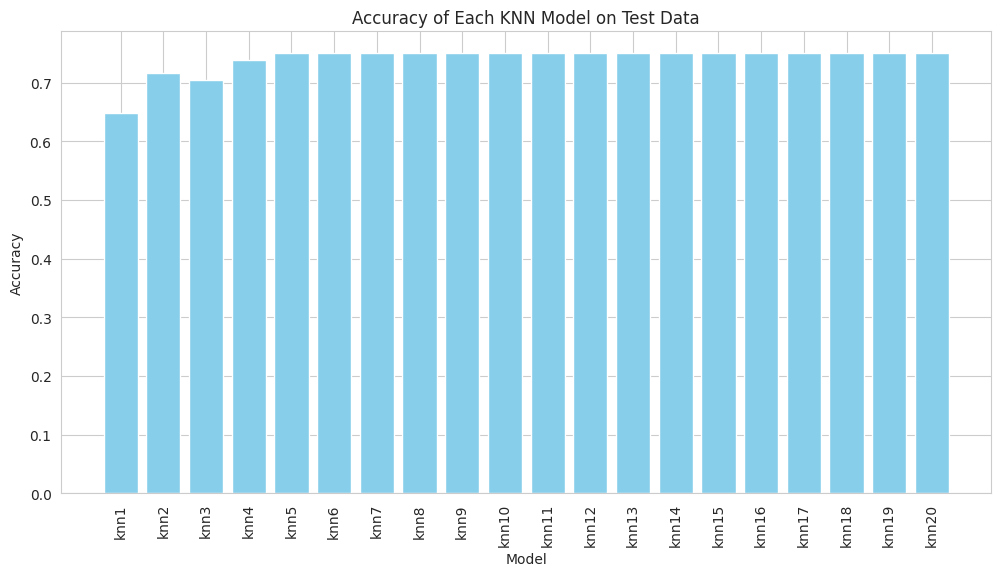

Prediction of knn1: 2
Prediction of knn2: 2
Prediction of knn3: 2
Prediction of knn4: 2
Prediction of knn5: 2
Prediction of knn6: 2
Prediction of knn7: 2
Prediction of knn8: 2
Prediction of knn9: 2
Prediction of knn10: 2
Prediction of knn11: 2
Prediction of knn12: 2
Prediction of knn13: 2
Prediction of knn14: 2
Prediction of knn15: 2
Prediction of knn16: 2
Prediction of knn17: 2
Prediction of knn18: 2
Prediction of knn19: 2
Prediction of knn20: 2


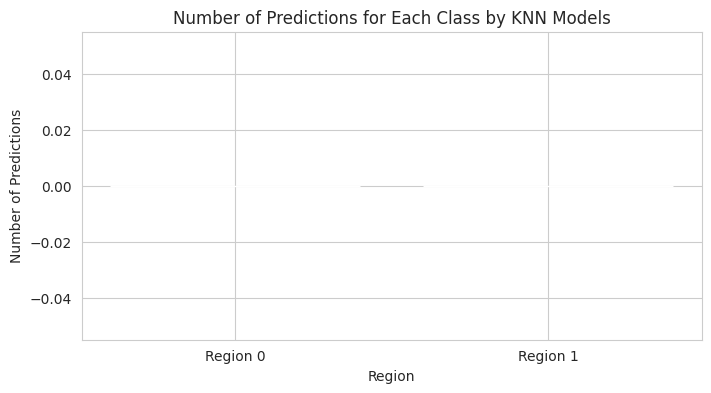


Prediction for X_new: 2

Overall Stacking Classifier Performance:
Accuracy: 0.4205


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Separate features and labels
feature_columns = ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[feature_columns].values
y = data['Region'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create list of estimators for StackingClassifier
estimators = [('knn' + str(i // 3), KNeighborsClassifier(n_neighbors=i)) for i in range(3, 63, 3)]

# Initialize StackingClassifier with GaussianNB as final estimator
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB()
)

# Train StackingClassifier
clf.fit(X_train, y_train)

# Evaluate accuracy for each KNN model and store the results
accuracies = []
for name, estimator in estimators:
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")
    accuracies.append(accuracy)

# Plotting the accuracy of each KNN model
model_names = [name for name, _ in estimators]
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each KNN Model on Test Data')
plt.xticks(rotation=90)
plt.show()

# Evaluate predictions for new data point by each KNN model
X_new = [[5, 8, 4, 3, 3, 5, 7]]
predictions = {}
for name, estimator in estimators:
    pred = estimator.predict(X_new)[0]
    predictions[name] = pred
    print(f"Prediction of {name}: {pred}")

# Counting predictions for each class
count_severity_0 = sum(1 for pred in predictions.values() if pred == 0)
count_severity_1 = sum(1 for pred in predictions.values() if pred == 1)

# Plotting the number of predictions for each class
plt.figure(figsize=(8, 4))
plt.bar(['Region 0', 'Region 1'], [count_severity_0, count_severity_1], color=['lightgreen', 'salmon'])
plt.xlabel('Region')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by KNN Models')
plt.show()

# Predict for new data using StackingClassifier
prediction = clf.predict(X_new)

print(f'\nPrediction for X_new: {prediction[0]}')

# Evaluate overall performance of the stacking classifier
avg_acc = clf.score(X_test, y_test)
print(f'\nOverall Stacking Classifier Performance:')
print(f'Accuracy: {avg_acc:.4f}')

# Obtain predictions from the model
y_pred = clf.predict(X_test)

# Modeling dengan Decission Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Memisahkan atribut dan label
feature_columns = ['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[feature_columns].values
y = data['Region'].values

# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# Membuat model Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)

# Melatih model dengan menggunakan data latih
dt_model = dt_model.fit(X_train, y_train)

# Melakukan prediksi menggunakan data uji
y_pred_dt = dt_model.predict(X_test)

# Evaluasi Model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
fscore_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Menampilkan hasil evaluasi
print("--- Evaluasi Model Decision Tree ---")
print(f'Akurasi: {accuracy_dt:.2f}')
print(f'Presisi: {precision_dt:.2f}')
print(f'Recall: {recall_dt:.2f}')
print(f'F-Score: {fscore_dt:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

--- Evaluasi Model Decision Tree ---
Akurasi: 0.65
Presisi: 0.64
Recall: 0.65
F-Score: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.23      0.24        13
           1       0.22      0.22      0.22         9
           2       0.78      0.79      0.78        66

    accuracy                           0.65        88
   macro avg       0.42      0.41      0.41        88
weighted avg       0.64      0.65      0.64        88



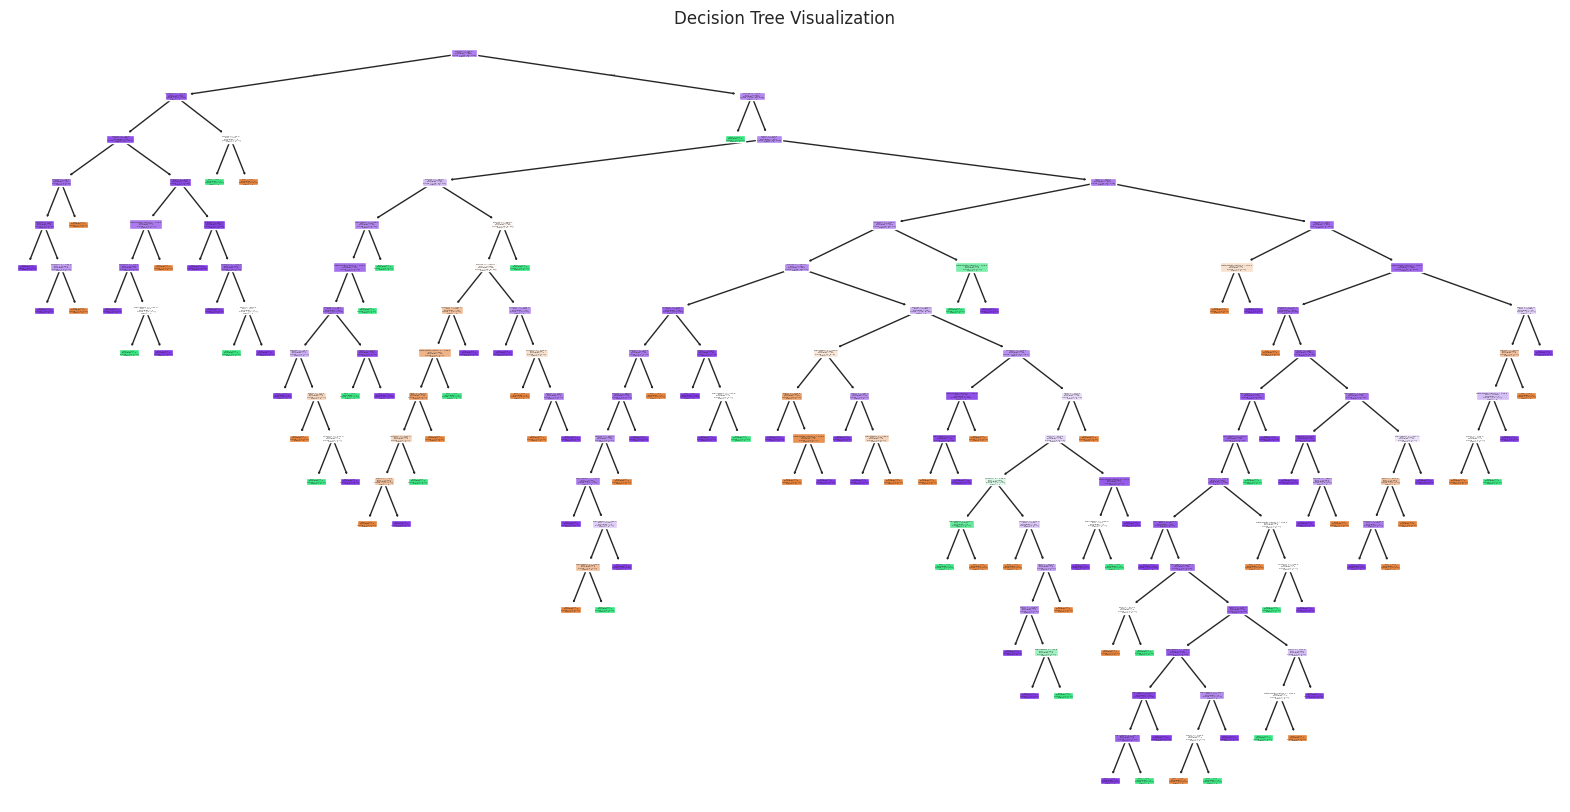

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=feature_columns, class_names=[str(i) for i in dt_model.classes_], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Bagging

Bagging melibatkan pembuatan beberapa subset dari data pelatihan dengan penggantian (bootstrap) dan melatih model yang berbeda pada setiap subset. Kemudian, hasil prediksi dari model-model ini diambil rata-rata (untuk regresi) atau diambil mayoritas (untuk klasifikasi).

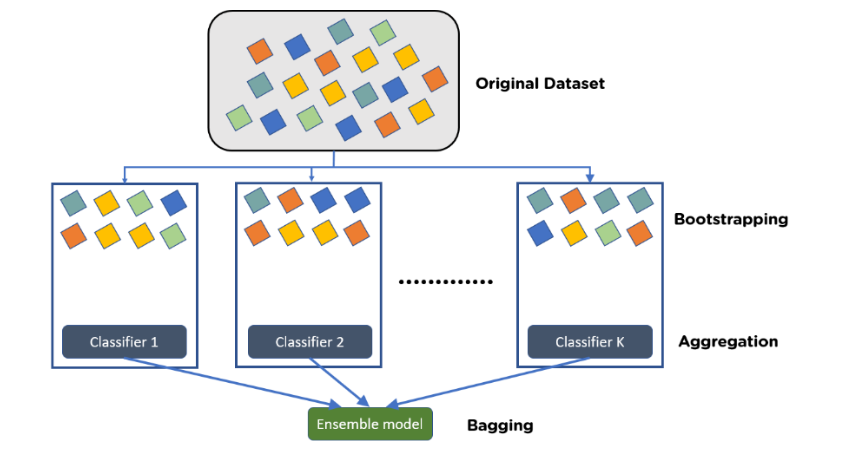

Metode bagging bertujuan untuk mengatasi variasi dan overfitting dalam model-machine learning. Bagging melibatkan langkah-langkah berikut:

1. Mengambil dataset pelatihan awal yang dimiliki.

2. Membuat beberapa set data pelatihan yang berbeda dengan cara mengambil sampel secara acak dari dataset awal. Setiap set data ini mungkin memiliki beberapa data yang sama dan beberapa yang berbeda.

3. Model yang sama (classifier) diterapkan pada setiap set data pelatihan ini dan menghasilkan prediksi masing-masing.

4. Hasil prediksi dari semua classifier digabungkan.

Metode bagging membantu mengurangi variabilitas dalam prediksi karena setiap set data pelatihan memiliki variasi yang berbeda. Variasi ini membuat model lebih stabil dan lebih baik kinerjanya daripada hanya menggunakan satu set data pelatihan saja.

pada bagging kami menggunakan 20 gaussian naive bayes yang menerima subset berbeda satu sama lain

Data yang baru yang akan diprediksi
   Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        5      8     4        3       3                 5           7

Estimator 1 accuracy : 0.5795
Estimator 1 memprediksi : 2

Estimator 2 accuracy : 0.3636
Estimator 2 memprediksi : 2

Estimator 3 accuracy : 0.6364
Estimator 3 memprediksi : 2

Estimator 4 accuracy : 0.6705
Estimator 4 memprediksi : 2

Estimator 5 accuracy : 0.4545
Estimator 5 memprediksi : 0

Estimator 6 accuracy : 0.7159
Estimator 6 memprediksi : 2

Estimator 7 accuracy : 0.5682
Estimator 7 memprediksi : 2

Estimator 8 accuracy : 0.5682
Estimator 8 memprediksi : 0

Estimator 9 accuracy : 0.4886
Estimator 9 memprediksi : 2

Estimator 10 accuracy : 0.7386
Estimator 10 memprediksi : 2

Estimator 11 accuracy : 0.3864
Estimator 11 memprediksi : 2

Estimator 12 accuracy : 0.3750
Estimator 12 memprediksi : 0

Estimator 13 accuracy : 0.5455
Estimator 13 memprediksi : 0

Estimator 14 accuracy : 0.6932
Estimator 14 me

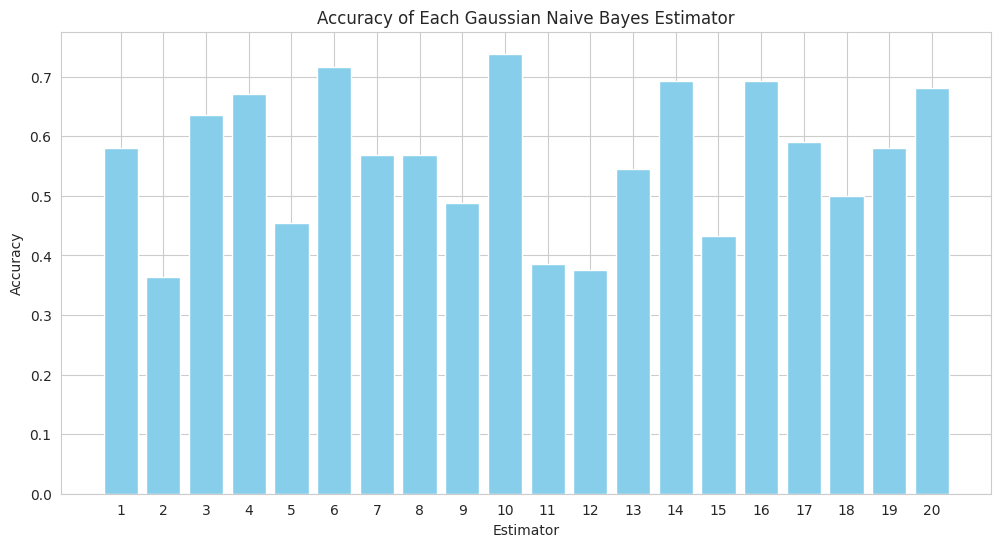

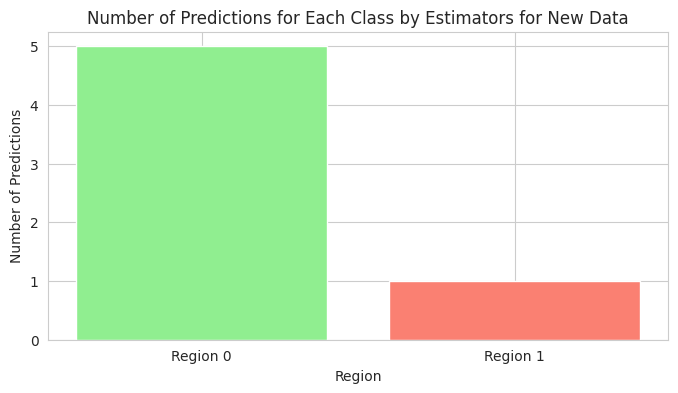

In [36]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Memisahkan atribut dan label
X = data[['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
y = data['Region']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Parameter bagging
n_estimators = 20
n_samples = int(len(X_train) / n_estimators)

# Inisialisasi list untuk menyimpan model dan akurasi
estimators = []
accuracies = []
pred = []

# Data baru yang ingin diprediksi
X_new = pd.DataFrame([[5, 8, 4, 3, 3, 5, 7]], columns=['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
print("Data yang baru yang akan diprediksi")
print(X_new)
print()
np.random.seed(0)

# Membuat model Gaussian Naive Bayes untuk setiap subset
for i in range(n_estimators):
    # Membuat bootstrap sample
    bootstrap_indices = np.random.randint(0, len(X_train), n_samples)
    X_train_bootstrap = X_train.iloc[bootstrap_indices]
    y_train_bootstrap = y_train.iloc[bootstrap_indices]

    # Melatih model
    gnb_model = GaussianNB()
    gnb_model.fit(X_train_bootstrap, y_train_bootstrap)
    estimators.append(gnb_model)

    # Evaluasi model
    bebas = gnb_model.predict(X_new)
    pred.append(bebas[0])  # Mengambil nilai prediksi dan menyimpannya di list pred
    y_pred = gnb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Estimator {i + 1} accuracy : {accuracy:.4f}")
    print(f"Estimator {i + 1} memprediksi : {int(bebas[0])}")
    print()

# Majority vote untuk prediksi data baru
pred_majority_vote = np.bincount(pred).argmax()
print(f"Majority vote prediction for new data: {pred_majority_vote}")

# Menghitung jumlah dari masing-masing kelas dalam pred
severity_counts = np.bincount(pred, minlength=5) #5 karena kelas ada 4
print(f"Jumlah prediksi kelas 0: {severity_counts[0] if len(severity_counts) > 0 else 0}")
print(f"Jumlah prediksi kelas 1: {severity_counts[1] if len(severity_counts) > 1 else 0}")

# Menghitung rata-rata akurasi dari semua estimators
average_accuracy = np.mean(accuracies)
print(f"Average accuracy of all estimators: {average_accuracy:.4f}")

# Plot accuracy untuk tiap estimator
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_estimators + 1), accuracies, color='skyblue')
plt.xlabel('Estimator')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each Gaussian Naive Bayes Estimator')
plt.xticks(range(1, n_estimators + 1))
plt.show()

# Plot the number of predictions pada setiap klass untuk data baru
severity_labels = ['Region 0', 'Region 1']
severity_values = [severity_counts[0] if len(severity_counts) > 0 else 0,
                severity_counts[1] if len(severity_counts) > 1 else 0]
plt.figure(figsize=(8, 4))
plt.bar(severity_labels, severity_values, color=['lightgreen', 'salmon'])
plt.xlabel('Region')
plt.ylabel('Number of Predictions')
plt.title('Number of Predictions for Each Class by Estimators for New Data')
plt.show()

# Evaluasi

Dari ketiga model yang dibuat dapat dilihat akurasi dari masing-masing model, yaitu:

* Single model GNB: 80%

* Single model SVM: 74%

* Stackking dengan KNN(sebagai model dasar) dan GNB(sebagai meta model): 85%

* Bagging dengan GNB: 65%

Dari ketiga model diatas dapat disimpulkan bahwa single model SVM memiliki akurasi tertinggi yaitu 87%.

# Deployment

## Menyimpan Model

pada tahap ini saya akan menyimpan model dari single model SVM yang sudah dibuat. Tujuan dilakukan penyimpanan model adalah supaya mudah dipanggil ketika akan memasuki tahap deployment.

Untuk library yang saya gunakan dalam menyimpan model yaitu joblib.

In [37]:
import joblib

# Save the model to a file
joblib.dump(svm_model, 'svm_model.pkl')


['svm_model.pkl']